InceptionV3

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from  tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
np.random.seed(123)
tf.random.set_seed(123)

In [ ]:

train_datagen=ImageDataGenerator(
    rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)


test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
'/content/drive/MyDrive/CNN Banana/dataset/train',
target_size=(150,150),
batch_size=32,
class_mode='categorical',
 shuffle=True
 )

validation_generator=test_datagen.flow_from_directory(
'/content/drive/MyDrive/CNN Banana/dataset/val',
target_size=(150,150),
batch_size=32,
class_mode='categorical',shuffle=True
)
test_generator=test_datagen.flow_from_directory(
'/content/drive/MyDrive/CNN Banana/dataset/test',
)

Found 3454 images belonging to 4 classes.
Found 431 images belonging to 4 classes.
Found 435 images belonging to 4 classes.


In [ ]:
################ Inceptionv3

In [ ]:
from tensorflow.keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet',
                       include_top=False,
                       input_shape=(150, 150, 3))

# Define the number of layers to freeze (e.g., the first 15 layers)
num_layers_to_freeze = 249  # Adjust the number of layers to freeze as needed

# Freeze the weights of the first num_layers_to_freeze layers
for layer in conv_base.layers[:num_layers_to_freeze]:
    layer.trainable = False


87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
model= models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(4,activation='softmax'))


In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               4718848   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 26522660 (101.18 MB)
Trainable params: 15834756 (60.40 MB)
Non-trainable params: 10687904 (40.77 MB)
_________________________________________________________________


In [ ]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/CNN Banana(80-20)/checkpointcb")



In [ ]:
from tensorflow.keras.optimizers import RMSprop
# Define the RMSprop optimizer with a learning rate and other optional parameters
rmsprop_optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07)

# Compile the model with the RMSprop optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_optimizer,
              metrics=['accuracy'])

In [ ]:

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
5/5 [==============================] - 32s 5s/step - loss: 22.4749 - accuracy: 0.2500 - val_loss: 87.6447 - val_accuracy: 0.2625
Epoch 2/100
5/5 [==============================] - 24s 5s/step - loss: 1.8676 - accuracy: 0.4625 - val_loss: 46.2079 - val_accuracy: 0.2875
Epoch 3/100
5/5 [==============================] - 23s 5s/step - loss: 1.2964 - accuracy: 0.6500 - val_loss: 16.9782 - val_accuracy: 0.4062
Epoch 4/100
5/5 [==============================] - 20s 4s/step - loss: 1.1955 - accuracy: 0.6062 - val_loss: 15.9964 - val_accuracy: 0.3500
Epoch 5/100
5/5 [==============================] - 23s 5s/step - loss: 0.9327 - accuracy: 0.6709 - val_loss: 2.7687 - val_accuracy: 0.6625
Epoch 6/100
5/5 [==============================] - 23s 5s/step - loss: 0.6913 - accuracy: 0.7437 - val_loss: 7.3205 - val_accuracy: 0.5500
Epoch 7/100
5/5 [==============================] - 23s 5s/step - loss: 0.8492 - accuracy: 0.6438 - val_loss: 3.1213 - val_accuracy: 0.6438
Epoch 8/100
5/5 [=====

In [ ]:
# Load and preprocess the test data
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/CNN Banana/dataset/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Disable shuffling for test data
)

# Make predictions on the test data
test_predictions = model.predict(test_generator)


Found 435 images belonging to 4 classes.
14/14 [==============================] - 22s 1s/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix

In [ ]:
# Get the true labels from the test generator
true_labels = test_generator.classes

In [ ]:
# Convert predicted probabilities to class labels
predicted_labels = np.argmax(test_predictions, axis=1)

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

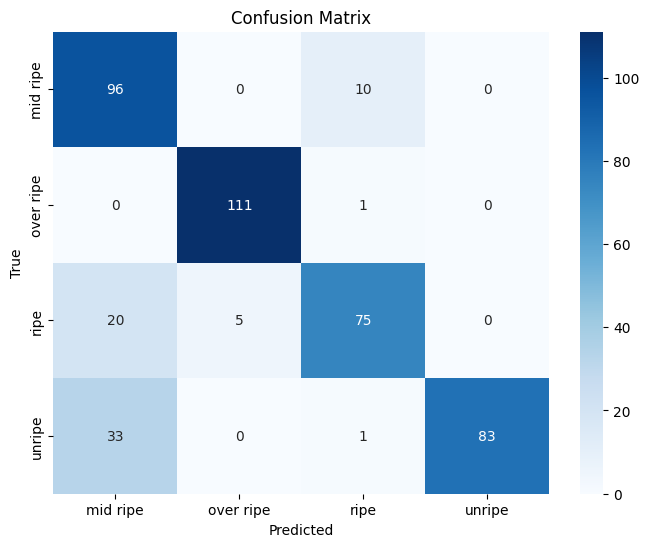

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print classification report
target_names = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=target_names)
print(report)

              precision    recall  f1-score   support

    mid ripe       0.64      0.91      0.75       106
   over ripe       0.96      0.99      0.97       112
        ripe       0.86      0.75      0.80       100
      unripe       1.00      0.71      0.83       117

    accuracy                           0.84       435
   macro avg       0.87      0.84      0.84       435
weighted avg       0.87      0.84      0.84       435



In [ ]:
# Number of classes
num_classes = 4  # Change this to match your number of classes

# Convert true labels to one-hot encoding
true_labels_one_hot = label_binarize(true_labels, classes=range(num_classes))

In [ ]:
# Calculate predicted probabilities for each class
predicted_probabilities = model.predict(test_generator)

14/14 [==============================] - 20s 1s/step


In [ ]:

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_one_hot[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


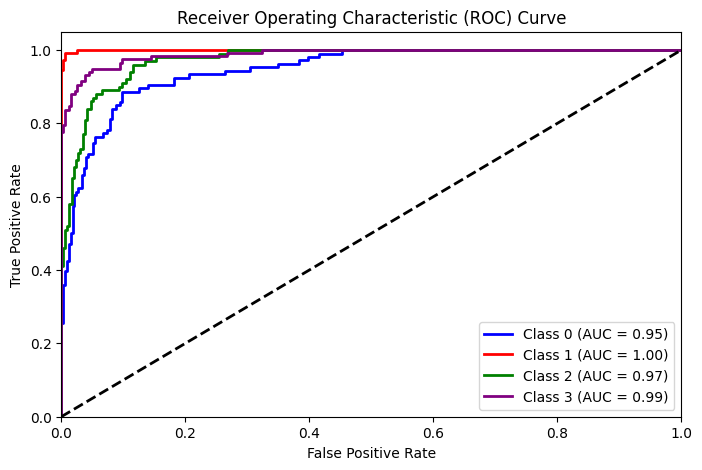

In [ ]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 5))
colors = cycle(['blue', 'red', 'green', 'purple'])  # Change or add more colors as needed

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()